도미, 곤들매기, 농어 강꼬치고기, 로치, 빙어, 송어를 분류하려고 한다.
먼적 간단한 것부터 해결하기로 하자. 먼저 도미와 빙어를 구분해보자.

머신러닝에서 여러 개의 종류 중 하나를 구별해 내는 문제를 **'분류(classification)'**라고 한다.

특히 이 장에서처럼 2개의 클래스 중 하나를 고르는 문제를 **'이진 분류(binary classification)'**라고 한다.

아래는 35마리의 도미의 길이와 무게를 나타낸 리스트이다.

In [1]:
# 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

리스트에서 첫 번째 도미의 길이는 25.4cm, 무게는 242.0g이고 두 번째 도미의 길이는 26.3cm, 290.0g과 같은 식이다.

즉, 도미의 특징을 길이와 무게로 표현한 것이다. 이러한 특징을 **'특성(feature)'**이라고 부르자.


위 처럼 두 특성을 숫자로 보는 것 보다 그래프로 표현하면 데이터를 잘 이해할 수 있고 앞으로 할 작업에 대한 힌트를 얻을 수도 있다. 

길이를 x축으로 하고 무게를 y축으로 하기로 하자. 그 다음 각 도미를 이 그래프에 점으로 표시해 보자.

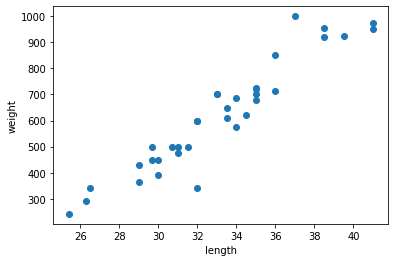

In [2]:
import matplotlib.pyplot as plt # matplotlib의 pyplot 함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

파이썬에서 과학 계산용 그래프를 그리는 대표적인 패키지는 **'맷플롯립(matplotlib)'**이다. 이 패키지를 임포트하여 산점도를 그리는 scatter() 함수를 사용했다.

위와 같은 그래프를 **'산점도(scatter plot)'**라고 부르며 2개의 특성을 사용한 그래프이므로 **'2차원 그래프'**라고 부른다. 또한 이렇게 그래프가 일직선에 가까운 형태로 나타나는 경우를 **'선형(linear)'**적이라고 한다.

그래프를 보면 도미는 길이가 길수록 무게가 많이 나간다는 사실을 확인할 수 있다.


아래는 빙어 14마리의 길이와 무게를 나타낸 리스트이다.

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

빙어 그래프는 도미 데이터와 함께 산점도로 그려 보도록 하자.
함께 산점도를 그리려면 scatter()함수를 연달아 사용하면 된다.

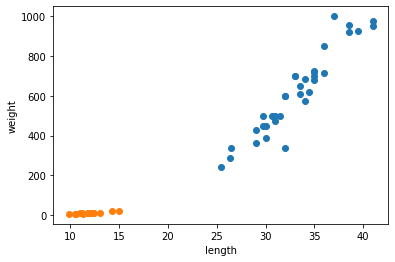

In [4]:
# 다음 코드는 matplotlib을 임포트하지 않는다.
# 이전에 임포트 되었기 때문에 굳이 하지 않아도 되기 때문이다.
# 단, 코랩에서 구글 클라우드와 연결이 끊긴 후 다시 연결하면 새로 임포트해야 한다.
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

위와 같이 빙어와 도미의 데이터를 함께 산점도로 나타내면 서로 다른 색깔로 구분된다. 그래프를 보면 빙어는 도미에 비해 길이도 무게도 매우 작다.

빙어도 도미와 비슷하게 길이와 무게가 비례하지만 늘어나는 정도가 조금 다르다.
빙어는 길이가 늘어나더라도 무게가 많이 늘지는 않는다. 따라서 빙어의 산점도도 **선형적**이지만 **무게가 길이에 영향을 덜 받는다고 볼 수 있다.**

이제 두 데이터를 스스로 구분하기 위한 첫 번째 머신러닝 프로그램을 만들어 보자.

**'k-최근접 이웃 알고리즘(k-Nearest Neighbors)'**을 사용해 두 데이터를 구분해 보자. k-최근접 이웃 알고리즘을 사용하기 전에 두 데이터를 하나의 데이터로 합치자.

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

우리가 사용할 머신러닝 패키지는 **'사이킷런(scikit-learn)'**이다. 이 패키지를 사용하려면 특성의 리스트가 세로 방향으로 늘어뜨린 2차원 리스트여야 한다.
이렇게 만드는 가장 쉬운 방법은 파이썬의 **zip() 함수와 리스트 내포(list comprehension) 구문을 사용**하는 것이다.

In [6]:
fish_data = [[l, w] for l, w in zip(length, weight)]
# fish_data

이로써 49개의 길이와 무게를 모두 준비했다. 이제 마지막으로 준비할 데이터는 **'정답 데이터'**이다. 단, 머신러닝이든 컴퓨터 프로그램이든 문자를 직접 이해하지 못한다. 따라서 도미와 빙어를 숫자 1과 0으로 표현하기로 하자.
앞에서 도미와 빙어를 순서대로 나열했으므로 **앞에 35개는 1이고 14개는 0이 된다.**

참고) 머신러닝에서 2개를 구분하는 경우 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓는다.

In [7]:
fish_target = [1] * 35 + [0] * 14

이제 사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 클래스인 **'KNeighborsClassifier'**를 임포트한다. 그리고 임포트한 KNeighborsClassifier 클래스의 객체를 만든다.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() # 객체 생성

이제 이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다. 이러한 과정을 **'훈련(training)'**이라고 부른다. 사이킷런에서는 **fit()메서드**가 이러한 역할을 한다. 이 메서드에 fish_data와 fish_target을 순서대로 전달해보자.

In [9]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

이제 객체(모델) kn이 얼마나 잘 훈련되었는지 평가해 보자.
사이킷런에서 모델을 평가하는 메서드는 score()메서드이다.
이 메서드는 0에서 1사이의 값을 반환한다. 1은 모든 데이터를 정확히 맞혔다는 것을 나타낸다. 예를 들어 0.5라면 절반만 맞혔다는 의미이다.

* 모델(model): 머신러닝 알고리즘을 구현한 프로그램을 모델이라고 부른다.

In [10]:
kn.score(fish_data, fish_target)

1.0

위는 fish_data의 답을 모두 맞혔다는 의미로 1.0이 출력된다.
이 값(1.0)을 **'정확도(accuracy)'**라고 부른다.

# k-최근접 이웃 알고리즘

앞에 만든 머신러닝 프로그램은 **'k-최근접 이웃(k-nearest neighbors)' 알고리즘**을 사용했다. 이 알고리즘에 대해 더 자세히 알아보자.

k-최근접 이웃 알고리즘은 **어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용**한다.
예를 들어, 도미와 빙어 머신러닝에서 [30, 600]은 도미에 가깝다. 따라서 해답을 도미(1)라고 판단할 것이다.

In [11]:
kn.predict([[30, 600]])

array([1])

**predict() 메서드**는 **새로운 데이터의 정답을 예측**한다.
fit()메서드와 마찬가지로 리스트의 리스트(2차원 리스트)를 전달해야 한다.
따라서 [30, 600]에 리스트를 한 번 더 감쌌다.

k-최근접 이웃 알고리즘을 위해 준비해야 할 일은 데이터를 모두 가지고 있는 것이 전부이다. 새로운 데이터에 대해 예측할 때는 **가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 된다**.

단점은 이러한 특징으로 **데이터가 아주 많은 경우 사용하기 어렵다**. 데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 든다.

사이킷런의 KNeightborsClassifier클래스는 _fit_X속성에 우리가 전달한 fish_data를 모두 가지고 있고 _y속성에 fish_target을 가지고 있다.

In [18]:
# print(kn._fit_X)
# print(kn._y)

이렇게 k-최근접 이웃 알고리즘의 특징을 살펴보면 실제로 무언가 훈련되는게 없는 셈이다. **fit()메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고**하여 도미인지 빙어인지 구분한다.

KNeighborsClassifier클래스는 **기본적으로 5개의 데이터를 참고**하며 이 개수는 n_neighbors 매개변수로 바꿀 수 있다.

In [20]:
kn49 = KNeighborsClassifier(n_neighbors = 49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143


In [21]:
print(35/49)

0.7142857142857143


위와 같이 가장 가까운 데이터 49개를 사용하는 k-최근접 이웃 모델은 fish_data 49개 중에 도미가 35개 이므로 어떤 데이터를 넣어도 **무조건 도미로 예측**한다.

# 정리

핵심 포인트

* 특성: 데이터를 표현하는 하나의 성질. 이 절에서는 생선 데이터 각각을 길이와 무게 특성으로 나타냈다.
* 훈련: 머신러닝 알고리즘이 데이터에서 규칙을 찾는 과정. (사이킷런에서는 fit()메서드가 하는 역할)
* k-최근접 이웃 알고리즘: 가장 간단한 머신러닝 알고리즘 중 하나. 사실 어떤 규칙을 찾기보다는 전체 데이터를 메모리에 가지고 있는 것이 전부다.
* 모델: 머신러닝 프로그램에서 알고리즘이 구현된 객체. 종종 알고리즘 자체를 모델이라고 부른다.
* 정확도: 정확한 답을 몇 개 맞혔는지를 백분율로 나타낸 값이다. (사이킷런에서는 0~1사이의 값으로 출력) / 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수) 

패키지

matplotlib
* scatter(): 산점도를 그리는 함수

scikit-learn
* KNeighborsClassifier: k-최근접 이웃 분류 모델을 만드는 사이킷런 클래스
* fit(): 사이킷런 모델을 훈련할 때 사용하는 메서드
* predict(): 사이킷런 모델을 훈련하고 예측할 때 사용하는 메서드. 특성 데이터 하나만 매개변수로 받는다.
* score(): 훈련된 사이킷런 모델의 성능을 측정한다.